## Fase 2: Transformación de los datos.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Libreria Regex para buscar patrones
import re

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Lectura de CSV

In [2]:
df_transformacion= pd.read_csv("HR_01.csv", index_col = None)
df_transformacion_copy = df_transformacion.copy()

In [9]:
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,year_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


**A.1. TRANSFORMACIONES EN TIPOS DE DATOS POR VARIABLES**

In [4]:
df_transformacion_copy.dtypes

age                            object
attrition                      object
business_travel                object
daily_rate                     object
department                     object
distance_from_home              int64
education                       int64
education_field                object
employee_count                  int64
employee_number                object
environment_satisfaction        int64
gender                          int64
hourly_rate                    object
job_involvement                 int64
job_level                       int64
job_role                       object
job_satisfaction                int64
marital_status                 object
monthly_income                 object
monthly_rate                    int64
num_companies_worked            int64
over18                         object
over_time                      object
percent_salary_hike             int64
performance_rating             object
relationship_satisfaction       int64
standard_hou

Seguramente esos números estén en float porque hay valores nulos, entonces el equipo va a tener que tener en cuenta que nunca se podrán transformar a int sin gestionar esos nulos.

work_life_balance object a int con nulos
total_working_years object  object a int con nulos
performance_rating object object a int con nulos
employee_number object a int con nulos

In [3]:
# Entero a float : monthly_rate

df_transformacion_copy["monthly_rate"]=df_transformacion_copy["monthly_rate"].astype(float)
df_transformacion_copy["monthly_rate"].dtypes

dtype('float64')

In [4]:
# Entero a object : gender
df_transformacion_copy["gender"]=df_transformacion_copy["gender"].astype(object)
df_transformacion_copy["gender"].dtypes


dtype('O')

In [5]:
# Object quitar caracter especial "$": "daily_rate" "salary"

columnas1 = ["daily_rate","salary"]

def cambiar_simbolo(columnas): 
    try:
        return columnas.str.replace("$","")
    except:
        return np.nan

for columna in columnas1:
    df_transformacion_copy[columna] = cambiar_simbolo(df_transformacion_copy[columna])

df_transformacion_copy.head()




,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,year_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,"684,0",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462.0,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000,NaN,NaN,Yes
1,52,No,NaN,"699,0",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678.0,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000,NaN,NaN,1
2,42,No,travel_rarely,"532,0",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933.0,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,"359,0",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703.0,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000,NaN,NaN,False
4,46,No,NaN,"1319,0",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000,NaN,NaN,0


In [6]:
# Object a float :"daily_rate","monthly_income","standard_hours"

columnas_a_float = ["daily_rate","monthly_income","standard_hours","salary"]

def cambiar_object_float(columnas):
    try:
        return columnas.str.replace(',', '.').astype(float)
    except:
        return np.nan

for columna in columnas_a_float:
    df_transformacion_copy[columna] = cambiar_object_float(df_transformacion_copy[columna])


df_transformacion_copy[columnas_a_float].dtypes



daily_rate        float64
monthly_income    float64
standard_hours    float64
salary            float64
dtype: object

In [7]:
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,year_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,19537.0,6462.0,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,19999.0,5678.0,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,1
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,19232.0,4933.0,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1.000000e+09,ManaGER - Research & Development,NaN,1
3,47,No,travel_rarely,359.0,NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,17169.0,26703.0,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1.000000e+09,NaN,NaN,False
4,46,No,NaN,1319.0,NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739.0,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1.000000e+09,NaN,NaN,0


**A.2. HOMOGENEIZACIÓN DATOS**

In [8]:
# Comprobar los valores únicos de las variables "age", "remote_work", "over18"

print(f'Analizar los valores únicos de las variables:\n-Variable "age":\n{df_transformacion_copy["age"].unique()}\n-Variable "remote_work":\n{df_transformacion_copy["remote_work"].unique()}\n-Variable "over18":\n{df_transformacion_copy["over18"].unique()}')

Analizar los valores únicos de las variables:
-Variable "age":
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' 'forty-seven' '53' '43' '60' '32' '37' '49' '39' '50'
 '44' '30' 'fifty-eight' '29' '31' '54' '57' '27' 'thirty-six' '28' '26'
 'fifty-five' '25' 'fifty-two' 'thirty-one' '24' 'thirty' '23' '22' '21'
 '20' 'twenty-six' '19' 'thirty-seven' '18' 'thirty-two' 'twenty-four']
-Variable "remote_work":
['Yes' '1' 'False' '0' 'True']
-Variable "over18":
['Y' nan]


In [9]:
# Reemplazar los valores para su homogeneización:

dicc_age = {"forty-seven": "47", "fifty-eight": "58", "thirty-six": "36", "fifty-five": "55", "fifty-two": "52", "thirty-one": "31", "thirty": "30", "twenty-six": "26", "thirty-seven": "37", "thirty-two": "32", "twenty-four": "24"}

dicc_remote = {"0": "No", "1": "Yes", "True":"Yes", "False": "No"}

dicc_over18 = {"Y": "Yes"}

def reemplazar_datos(df_transformacion_copy):
    
    df_transformacion_copy["age"] = df_transformacion_copy["age"].replace(dicc_age)

 
    df_transformacion_copy["remote_work"] = df_transformacion_copy["remote_work"].replace(dicc_remote)

 
    df_transformacion_copy["over18"] = df_transformacion_copy["over18"].replace(dicc_over18)

    return df_transformacion_copy

df_transformacion_copy = reemplazar_datos(df_transformacion_copy)

In [10]:
# Comprobar los valores únicos de las variables "age", "remote_work", "over18" después del reemplazo

print(f'Comprobación de la homogeneización de los valores depués del reemplazo:\n-Variable "age":\n{df_transformacion_copy["age"].unique()}\n-Variable "remote_work":\n{df_transformacion_copy["remote_work"].unique()}\n-Variable "over18":\n{df_transformacion_copy["over18"].unique()}')

Comprobación de la homogeneización de los valores depués del reemplazo:
-Variable "age":
['51' '52' '42' '47' '46' '48' '59' '41' '56' '38' '55' '40' '58' '35'
 '45' '33' '36' '34' '53' '43' '60' '32' '37' '49' '39' '50' '44' '30'
 '29' '31' '54' '57' '27' '28' '26' '25' '24' '23' '22' '21' '20' '19'
 '18']
-Variable "remote_work":
['Yes' 'No']
-Variable "over18":
['Yes' nan]


distance_from_Home:

Gestion de la columna "DistanceFromHome". Esta columna no tiene que tener ningun valor negativo. El tipo de dato es entero por lo que no hace falta cambiarlo.

In [11]:
# Creamos una funcion para cambiar valores negativos utilizamos el metodo .abs()
# El valor absoluto de un número negativo es el mismo número pero sin el signo negativo.

def sustituir_negativos(df, columna):
    df.loc[df[columna] < 0, columna] = df[columna].abs()  # selecciono solo las filas en las que el valor es negativo y lo convierto a positivo con .abs
    return df

sustituir_negativos(df_transformacion_copy, "distance_from_home")

# Comprobamos que ya no tiene negativos
print(df_transformacion_copy["distance_from_home"].sort_values())


157      1
1382     1
472      1
469      1
465      1
176      1
178      1
179      1
1371     1
941      1
1365     1
1364     1
942      1
1385     1
189      1
961      1
1347     1
197      1
445      1
1342     1
443      1
1332     1
964      1
965      1
207      1
1326     1
972      1
957      1
431      1
918      1
1391     1
853      1
127      1
861      1
1428     1
131      1
132      1
1423     1
865      1
509      1
508      1
1416     1
141      1
917      1
142      1
505      1
502      1
1408     1
883      1
887      1
1403     1
892      1
1156     1
1397     1
160      1
897      1
1393     1
1412     1
524      1
213      1
1310     1
375      1
1248     1
1246     1
1075     1
1239     1
1233     1
1225     1
355      1
282      1
1098     1
1104     1
344      1
1259     1
1192     1
1119     1
340      1
339      1
335      1
1128     1
1182     1
331      1
1133     1
1171     1
1145     1
320      1
1150     1
292      1
1319     1
261      1
1061     1

Columna marital_status:
Primero gestionamos los errores tipograficos.
Segundo gestionamos los nulos segun el porcentaje que ocupa cada valor escogeremos la solucion.

In [12]:

# creamos una función para corregir los errores tipograficos de la columna marital_status

def corregir_errores_maritalstatus(df, columna):
    
    df.loc[df[columna] == 'Marreid', columna] = 'Married'
    df.loc[df[columna] == 'divorced', columna] = 'Divorced'

corregir_errores_maritalstatus(df_transformacion_copy, "marital_status")

print(df_transformacion_copy["marital_status"])


0            NaN
1            NaN
2        Married
3        Married
4       Divorced
5            NaN
6            NaN
7        Married
8        Married
9            NaN
10           NaN
11       Married
12       Married
13       Married
14        Single
15           NaN
16        Single
17           NaN
18       Married
19           NaN
20           NaN
21        Single
22      Divorced
23       Married
24           NaN
25       Married
26       Married
27        Single
28       Married
29           NaN
30      Divorced
31           NaN
32           NaN
33        Single
34        Single
35      Divorced
36       Married
37       Married
38       Married
39       Married
40       Married
41        Single
42      Divorced
43        Single
44      Divorced
45       Married
46        Single
47       Married
48        Single
49       Married
50       Married
51           NaN
52       Married
53       Married
54      Divorced
55      Divorced
56           NaN
57           NaN
58       Marri

In [13]:
# comprobamos nulos 

nulos_estado_civil = df_transformacion_copy["marital_status"].isnull().sum()
print(f"Los nulos de la  columna marital_status: {nulos_estado_civil}")

Los nulos de la  columna marital_status: 651


In [14]:
# comprobamos el numero y el  porcentaje de casados, solteros y divorciados hay para poder elegir por la moda o unknow 
total_estado_civil = df_transformacion_copy["marital_status"].value_counts()
print(f"Los totales de la  columna: {total_estado_civil}")



Los totales de la  columna: marital_status
Married     439
Single      325
Divorced    199
Name: count, dtype: int64


In [15]:
# comprobamos el porcentaje 
print((df_transformacion_copy["marital_status"].value_counts() / df_transformacion_copy.shape[0]) * 100)

marital_status
Married     27.199504
Single      20.136307
Divorced    12.329616
Name: count, dtype: float64


In [16]:
# Como no hay ningun valor por encima del 75% o 80%, no podemos usar la moda. Rellenamos con "Unknown"
df_transformacion_copy["marital_status"] = df_transformacion_copy["marital_status"].fillna('Unknown')

In [17]:
# Comprobamos que no hay nulos y los porcentajes de los valores
print("Nulos: ", df_transformacion_copy["marital_status"].isnull().sum())
print((df_transformacion_copy["marital_status"].value_counts() / df_transformacion_copy.shape[0]) * 100)

Nulos:  0
marital_status
Unknown     40.334572
Married     27.199504
Single      20.136307
Divorced    12.329616
Name: count, dtype: float64


Columnas JobRole, Department y RoleDepartament

job_role: homogeneizar los datos, todos en min

In [18]:
# con el metodo str.title(), convertimos la cadena de texto en formato capitalizado (donde la primera letra de cada palabra está en mayúscula y el resto en minúscula). 
# Me estaba dando un error porque habia espacios en blanco por lo que utilizamos  el metodo str.strip() para eliminar los espacios en blanco

df_transformacion_copy['job_role'] = df_transformacion_copy['job_role'].str.title().str.strip()

print(df_transformacion_copy["job_role"])


0               Research Director
1                         Manager
2                         Manager
3               Research Director
4                 Sales Executive
5                         Manager
6                 Sales Executive
7                 Sales Executive
8                         Manager
9               Research Director
10              Research Director
11         Manufacturing Director
12              Research Director
13              Research Director
14              Research Director
15                        Manager
16              Research Director
17                        Manager
18             Research Scientist
19         Manufacturing Director
20      Healthcare Representative
21              Research Director
22      Healthcare Representative
23                        Manager
24                Sales Executive
25         Manufacturing Director
26                        Manager
27         Manufacturing Director
28          Laboratory Technician
29            

role_department: Lo completamos con la info

In [19]:
# Con la columna role_departament creamos un Diccionario que relaciona el tanto el rol con el departamento.
# Con método map toma cada valor de la columna job_role y lo reemplaza con el valor asociado en el diccionario role_department. 
# Es decir, busca cada rol en el diccionario y asigna el departamento correspondiente a la nueva columna department.

role_department = { 
    "Sales Executive" : "Sales", 
    "Research Scientist" : "Research & Development",
    "Laboratory Technician" : "Research & Development",
    "Manufacturing Director" : "Research & Development",
    "Healthcare Representative" : "Research & Development",
    "Manager" : "Research & Development",
    "Sales Representative" : "Sales",
    "Research Director" : "Research & Development",
    "Human Resources" : "Research & Development"
}

# Rellenamos la columna "department" con los valores a través del metodo map, donde mapeamos el rol con el departmento en el diccionario de mapeo que nos hemos creado.
df_transformacion_copy['department'] = df_transformacion_copy['job_role'].map(role_department)

print(df_transformacion_copy["department"])

0       Research & Development
1       Research & Development
2       Research & Development
3       Research & Development
4                        Sales
5       Research & Development
6                        Sales
7                        Sales
8       Research & Development
9       Research & Development
10      Research & Development
11      Research & Development
12      Research & Development
13      Research & Development
14      Research & Development
15      Research & Development
16      Research & Development
17      Research & Development
18      Research & Development
19      Research & Development
20      Research & Development
21      Research & Development
22      Research & Development
23      Research & Development
24                       Sales
25      Research & Development
26      Research & Development
27      Research & Development
28      Research & Development
29                       Sales
30                       Sales
31      Research & Development
32      

In [20]:
# Comprobamos que no hay nulos y los porcentajes de los valores
print("Nulos en columna department ", df_transformacion_copy["department"].isnull().sum())

Nulos en columna department  0


In [21]:
df_transformacion_copy.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,year_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,Research & Development,6,3,NaN,1,"162,0",1,0,51,3,5,Research Director,3,Unknown,19537.0,6462.0,7,Yes,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,Research & Development,1,4,Life Sciences,1,"259,0",3,0,65,2,5,Manager,3,Unknown,19999.0,5678.0,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,Yes


In [22]:
# Cambio de categóricos 

categoricas = ["age","employee_number", "performance_rating", "total_working_years", "work_life_balance"]
df_transformacion_copy[categoricas].dtypes

age                    object
employee_number        object
performance_rating     object
total_working_years    object
work_life_balance      object
dtype: object

In [23]:
def cambiar_comas_obj(columnas):
    try:
        return columnas.str.replace(',', '.')
    except:
        return np.nan

for columna in categoricas:
    df_transformacion_copy[columna] = cambiar_comas_obj(df_transformacion_copy[columna])


df_transformacion_copy[categoricas].dtypes


age                    object
employee_number        object
performance_rating     object
total_working_years    object
work_life_balance      object
dtype: object

In [24]:
# Convertir age a int
df_transformacion_copy['age'] = df_transformacion_copy['age'].astype(int)

# Convertir categoricas con nulos a float

categoricas1 = ["employee_number", "performance_rating", "total_working_years", "work_life_balance"]

df_transformacion_copy[categoricas1] = df_transformacion_copy[categoricas1].astype(float)


# Visualizamos los primeros registros
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,same_as_monthly_income,year_birth,salary,role_departament,number_children,remote_work
0,51,No,NaN,684.0,Research & Development,6,3,NaN,1,162.0,1,0,51,3,5,Research Director,3,Unknown,19537.0,6462.0,7,Yes,No,13,3.0,3,NaN,0,NaN,5,3.0,20,NaN,15,15,"19537,0",1972,1.000000e+09,NaN,NaN,Yes
1,52,No,NaN,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,0,65,2,5,Manager,3,Unknown,19999.0,5678.0,0,NaN,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,NaN,11,9,"19999,0",1971,1.000000e+09,NaN,NaN,Yes
2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,0,58,3,5,Manager,4,Married,19232.0,4933.0,1,NaN,No,11,3.0,4,NaN,0,22.0,3,NaN,22,NaN,11,15,"19232,0",1981,1.000000e+09,ManaGER - Research & Development,NaN,Yes
3,47,No,travel_rarely,359.0,Research & Development,2,4,Medical,1,NaN,1,1,82,3,4,Research Director,3,Married,17169.0,26703.0,3,Yes,NaN,19,3.0,2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1.000000e+09,NaN,NaN,No
4,46,No,NaN,1319.0,Sales,3,3,Technical Degree,1,NaN,1,1,45,4,4,Sales Executive,1,Divorced,NaN,7739.0,2,Yes,No,12,3.0,4,NaN,1,NaN,5,3.0,19,NaN,2,8,NaN,1977,1.000000e+09,NaN,NaN,No


In [25]:
#Comprobación
df_transformacion_copy[categoricas].dtypes

age                      int64
employee_number        float64
performance_rating     float64
total_working_years    float64
work_life_balance      float64
dtype: object

PENDIENTE:función de not availlable en hourly_rate 

A.3 ELIMINACIÓN DE COLUMNAS

**Columnas a eliminar**
- role_departament
- number_children
- same_as_monthly_income
- years_in_current_role

In [26]:
columnas_eliminar=["role_departament","number_children", "same_as_monthly_income", "years_in_current_role"]
df_transformacion_copy = df_transformacion_copy.drop(columnas_eliminar, axis=1)

df_transformacion_copy.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'year_birth', 'salary', 'remote_work'],
      dtype='object')

### B.1 IMPUTACIÓN DE NULOS

VARIABLES  CATEGÓRICAS

In [28]:
# Lista de las columnas categóricas con nulos:

categoricas = ["over18", "education_field"]

In [29]:
print('Valores unicos de business_travel',df_transformacion_copy["business_travel"].unique())
print('Total nulos de business_travel',df_transformacion_copy["business_travel"].isnull().sum())

Valores unicos de business_travel [nan 'travel_rarely' 'travel_frequently' 'non-travel']
Total nulos de business_travel 772


In [30]:

distribucion_nulos= display(df_transformacion_copy["business_travel"].value_counts() / df_transformacion_copy.shape[0]) 


business_travel
travel_rarely        0.363073
travel_frequently    0.102230
non-travel           0.056382
Name: count, dtype: float64

En bussines travel no hay ningún valor dominante por lo que se usará 'Unknown' para gestionar los nulos

In [31]:
df_transformacion_copy["business_travel"] = df_transformacion_copy["business_travel"].fillna("Unknown")


print("Total nulos:",df_transformacion_copy["business_travel"].isnull().sum())
print('Valores unicos de business_travel',df_transformacion_copy["business_travel"].unique())


Total nulos: 0
Valores unicos de business_travel ['Unknown' 'travel_rarely' 'travel_frequently' 'non-travel']


In [33]:
# Caracteres especiales datos business_travel

# Homogeneización de datos quitamos "-" y "_"

df_transformacion_copy['business_travel'] = df_transformacion_copy['business_travel'].str.replace(r'[-_]', ' ', regex=True)

# Visualizamos los primeros registros
df_transformacion_copy.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,NaN,1,162.0,1,0,51,3,5,Research Director,3,Unknown,19537.0,6462.0,7,Yes,No,13,3.0,3,NaN,0,NaN,5,3.0,20,15,15,1972,1.000000e+09,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,0,65,2,5,Manager,3,Unknown,19999.0,5678.0,0,NaN,NaN,14,3.0,1,NaN,1,34.0,5,3.0,33,11,9,1971,1.000000e+09,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,0,58,3,5,Manager,4,Married,19232.0,4933.0,1,NaN,No,11,3.0,4,NaN,0,22.0,3,NaN,22,11,15,1981,1.000000e+09,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,NaN,1,1,82,3,4,Research Director,3,Married,17169.0,26703.0,3,Yes,NaN,19,3.0,2,NaN,2,NaN,2,NaN,20,5,6,1976,1.000000e+09,No
4,46,No,Unknown,1319.0,Sales,3,3,Technical Degree,1,NaN,1,1,45,4,4,Sales Executive,1,Divorced,NaN,7739.0,2,Yes,No,12,3.0,4,NaN,1,NaN,5,3.0,19,2,8,1977,1.000000e+09,No


1.1. Distribución de las categorías por cada columna

In [34]:
# Lista de las columnas categóricas con nulos:

categoricas = ["over18", "education_field", "over_time"]

In [35]:
for columna in categoricas:
    print(f"La distribución de las categorías para la columna: {columna}")
    display(df_transformacion_copy[columna].value_counts() / df_transformacion_copy.shape[0]) 
    print("______________________")

La distribución de las categorías para la columna: over18


over18
Yes    0.44176
Name: count, dtype: float64

______________________
La distribución de las categorías para la columna: education_field


education_field
Life Sciences       0.216233
Medical             0.171004
Marketing           0.064436
Technical Degree    0.042751
Other               0.036555
Human Resources     0.007435
Name: count, dtype: float64

______________________
La distribución de las categorías para la columna: over_time


over_time
No     0.422553
Yes    0.158612
Name: count, dtype: float64

______________________


1.2. Divisón de las columnas en dos grupos / tipos:
- Columnas a reemplazar por la moda:
    - OVER18 -->  44%
    - OVER_TIME --> 42%
- Columnas a reemplazar por una categoría / etiqueta nueva:
    - EDUCATION_FIELD --> etiqueta "Other"
    

In [39]:
# Columnas categóricas con valores nulos: Cambiar de object a entero

columna_moda = ["over18", "over_time"]

def reemplazar_moda (df_transformacion_copy, columnas_moda):
    
    for columna in columnas_moda:
        
        moda = df_transformacion_copy[columna].mode()[0]    
        
        df_transformacion_copy[columna] = df_transformacion_copy[columna].fillna(moda)

    return df_transformacion_copy

df_transformacion_copy = reemplazar_moda(df_transformacion_copy, columna_moda)

df_transformacion_copy[columna_moda].isnull().sum()

over18       0
over_time    0
dtype: int64

In [ ]:
df_transformacion_copy[["over18", "over_time"]]

- **Columnas categóricas a reemplazar por una categoría / etiqueta nueva:**

In [44]:
columnas_etiqueta = ["education_field"]

def reemplazar_etiqueta(df_transformacion_copy, columnas):
    
    for columna in columnas:
        
        df_transformacion_copy[columna] = df_transformacion_copy[columna].fillna("Other")
    
    return df_transformacion_copy

df_transformacion_copy = reemplazar_etiqueta(df_transformacion_copy, columnas_etiqueta)

df_transformacion_copy[columnas_etiqueta].isnull().sum()



education_field    0
dtype: int64

In [45]:
df_transformacion_copy["education_field"].unique()

array(['Other', 'Life Sciences', 'Technical Degree', 'Medical',
       'Marketing', 'Human Resources'], dtype=object)

VARIABLES NUMÉRICAS

Imputacion nulos de daily rate

In [46]:
print('Valores unicos de daily_rate',df_transformacion_copy["daily_rate"].unique())
print('Total nulos de daily_rate',df_transformacion_copy["daily_rate"].isnull().sum())
print('Tipo de dato daily_rate',df_transformacion_copy["daily_rate"].dtypes)

Valores unicos de daily_rate [ 684.  699.  532.  359. 1319.  117. 1435.  635. 1276.  840.  247. 1369.
  201. 1360.  692. 1398.  286. 1402.  819.  884. 1238.  515. 1223.  202.
  928.  607.  266.  429.  589.   nan 1180. 1282.  776.  665.  526. 1034.
 1403. 1499.  580.  859.  263. 1376.  885. 1003. 1321.  394. 1372. 1333.
  228.  737.  823.  667.  301.  573. 1329.  630. 1063. 1017. 1296.  939.
 1355. 1448.  200. 1202.  404.  208.  813.  465. 1189. 1001. 1394.  161.
  288.  682. 1354.  147.  119. 1413.  452.  334. 1132.  982.  480. 1099.
  672. 1379.  583. 1492. 1050.  469.  237. 1440. 1291. 1157. 1336. 1224.
  735. 1389.  638. 1240.  194. 1339.  111. 1469.  470. 1232. 1249.  798.
  549.  570.  541.  164. 1117.  619.  319.  956. 1245. 1397.  527.  213.
  882.  330.  406.  217.  481.  669. 1465.  685. 1062.  177. 1199.  648.
  412.  282.  770.  601.  855.  332. 1326.  748.  405.  790.  971. 1370.
  750.  880.  678. 1179.  350. 1266.  574.  189.  310.  722. 1219.  994.
  721.  853.  427.  85

In [47]:
# Lista de columnas numericas que tienen nulos
nulos_num = df_transformacion_copy[df_transformacion_copy.columns[df_transformacion_copy.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_num)

Las columnas numéricas que tienen nulos son : 
 
Index(['daily_rate', 'employee_number', 'monthly_income', 'performance_rating',
       'standard_hours', 'total_working_years', 'work_life_balance'],
      dtype='object')


Analisis:
- `hourly_rate`: no tiene datos se puede sacar dividiendo monthly income con numero de horas al mes

In [48]:
#Nulos variables numéricas
df_nulos_numerico= pd.DataFrame((df_transformacion_copy[nulos_num].isnull().sum() / df_transformacion_copy[nulos_num].shape[0]) * 100, columns = ["%_nulos"])
df_nulos_numerico

,%_nulos
daily_rate,7.682776
employee_number,26.703841
monthly_income,52.230483
performance_rating,12.081784
standard_hours,74.039653
total_working_years,32.589839
work_life_balance,6.691450


In [49]:
num_con_valores=["daily_rate", 'employee_number', 'monthly_income',
       'performance_rating', 'standard_hours', 'total_working_years',
       'work_life_balance']

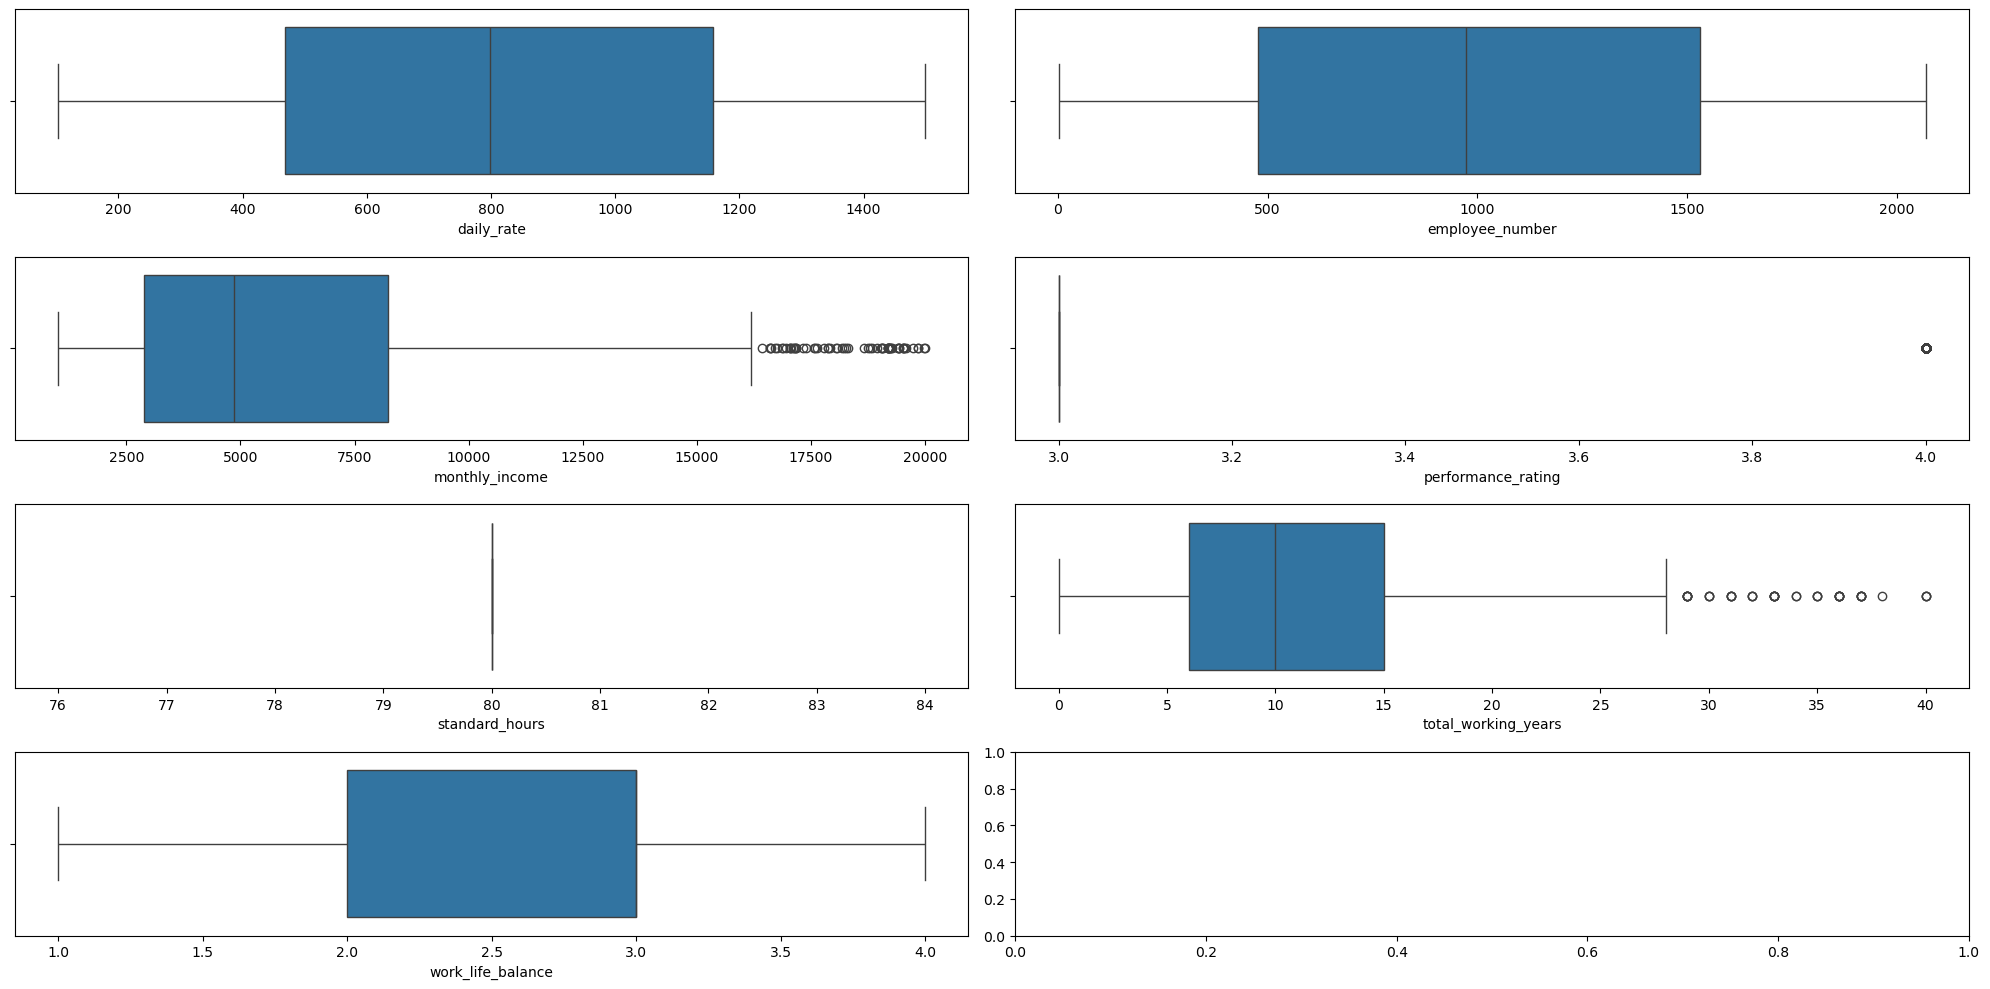

In [50]:
#Valores atipicos o outliers

fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(num_con_valores):
    sns.boxplot(x = col, data =df_transformacion_copy, ax = axes[indice])
    
plt.tight_layout();

**Análisis**

`Daily rate, employee_number, work_life_balance`: no tienen outliers, se pueden gestionar con la media o mediana. Para seleccionar el método más eficiente es necesario analizar porcentaje de nulos. 

`Daily rate`: tiene 7.6% de nulos y no tiene outliers así que obtaremos por la media

`montly income`: tiene muchos outliers y un 52% de nulos. Se imputará con interative.imputer

`performance_rating`: tiene outliers y un 12% de nulos.

`standard_hours`: PENDIENTE


B.1.1 IMPUTACIÓN DAILY RATE

In [51]:
# Calculo de la media
media_daily_rate= df_transformacion_copy["daily_rate"].mean()
print(f"La media de la columna 'daily_rate' es: {round(media_daily_rate, 2)}")

# aplicamos el método 'fillna()' a la columna
df_transformacion_copy["daily_rate"] = df_transformacion_copy["daily_rate"].fillna(media_daily_rate)

# comprobamos los nulos para la columna
print(f"Después del 'fillna' tenemos {df_transformacion_copy["daily_rate"].isnull().sum()} nulos")


La media de la columna 'daily_rate' es: 802.09
Después del 'fillna' tenemos 0 nulos


B.1.2 STANDAR HOURS

In [52]:
print('Valores unicos de standar_hours',df_transformacion_copy["standard_hours"].unique())
print('----------------')
print('Total nulos de standar_hours',df_transformacion_copy["standard_hours"].isnull().sum())
print('----------------')
print('Tipo de dato standar_hours',df_transformacion_copy["standard_hours"].dtypes)

Valores unicos de standar_hours [nan 80.]
----------------
Total nulos de standar_hours 1195
----------------
Tipo de dato standar_hours float64


Tiene solo dos valores unicos [nan 80.]. Aunque tiene un porcentaje alto de nulos 	74.0%. 

- Analizar si se puede complementar con otra columna
- Posibilidad de ser eliminada
- Utilizar método de predicción avanzado

B.1.3 EMPLOYEE NUMBER

In [53]:
df_transformacion_copy["employee_number"].value_counts() 


employee_number
482.0     2
530.0     2
507.0     2
517.0     2
522.0     2
523.0     2
525.0     2
526.0     2
544.0     2
501.0     2
725.0     2
724.0     2
722.0     2
721.0     2
717.0     2
710.0     2
502.0     2
495.0     2
747.0     2
440.0     2
734.0     2
733.0     2
728.0     2
423.0     2
424.0     2
433.0     2
447.0     2
1140.0    2
455.0     2
460.0     2
465.0     2
470.0     2
475.0     2
478.0     2
682.0     2
663.0     2
653.0     2
1069.0    2
389.0     2
388.0     2
381.0     2
376.0     2
1044.0    2
1053.0    2
1195.0    2
621.0     2
1185.0    2
1162.0    2
1161.0    2
1160.0    2
1157.0    2
1131.0    2
401.0     2
416.0     2
430.0     2
438.0     2
446.0     2
448.0     2
454.0     2
458.0     2
476.0     2
483.0     2
488.0     2
500.0     2
534.0     2
586.0     2
595.0     2
608.0     2
616.0     2
742.0     2
1135.0    2
762.0     2
1849.0    2
972.0     2
990.0     2
1927.0    2
1911.0    2
1898.0    2
1869.0    2
1821.0    2
966.0     2
1816.0    2


In [54]:
# Revisamos si tenemos duplicados
df_transformacion_copy["employee_number"].duplicated().sum()

534

In [55]:

print(f'{df_transformacion_copy.duplicated(subset = "employee_number", keep=False)}')

0       False
1       False
2       False
3        True
4        True
5       False
6       False
7       False
8        True
9       False
10      False
11       True
12       True
13      False
14       True
15      False
16      False
17       True
18       True
19       True
20      False
21      False
22       True
23      False
24       True
25       True
26       True
27      False
28       True
29      False
30      False
31      False
32      False
33      False
34       True
35      False
36      False
37      False
38       True
39      False
40      False
41       True
42      False
43      False
44      False
45      False
46      False
47      False
48      False
49      False
50       True
51      False
52       True
53      False
54      False
55       True
56      False
57      False
58       True
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69       True
70       True
71    

Employee number: Algunos parecen duplicados, 

In [56]:
print('----------------')
print('Total nulos de employee_number',df_transformacion_copy["employee_number"].isnull().sum())
print('----------------')
print('Tipo de dato employee_number',df_transformacion_copy["employee_number"].dtypes)

----------------
Total nulos de employee_number 431
----------------
Tipo de dato employee_number float64


In [57]:
df_transformacion_copy1= df_transformacion_copy.copy()

In [58]:
df_sin_duplicados = df_transformacion_copy1.drop_duplicates(subset=['employee_number'])

In [59]:
# Comprobación
df_sin_duplicados["employee_number"].duplicated().sum()

0

In [60]:
df_sin_duplicados["employee_number"].value_counts() 

employee_number
162.0     1
1027.0    1
896.0     1
902.0     1
916.0     1
922.0     1
925.0     1
930.0     1
939.0     1
975.0     1
991.0     1
995.0     1
1001.0    1
1010.0    1
1017.0    1
1022.0    1
1028.0    1
888.0     1
1037.0    1
1044.0    1
1053.0    1
1069.0    1
1077.0    1
1084.0    1
1094.0    1
1096.0    1
1099.0    1
1102.0    1
1103.0    1
1108.0    1
1114.0    1
1131.0    1
893.0     1
885.0     1
632.0     1
746.0     1
659.0     1
664.0     1
665.0     1
666.0     1
671.0     1
675.0     1
686.0     1
699.0     1
705.0     1
707.0     1
712.0     1
732.0     1
738.0     1
744.0     1
752.0     1
881.0     1
754.0     1
769.0     1
792.0     1
797.0     1
800.0     1
806.0     1
813.0     1
819.0     1
838.0     1
847.0     1
852.0     1
859.0     1
872.0     1
874.0     1
1135.0    1
1140.0    1
1157.0    1
1568.0    1
1464.0    1
1466.0    1
1467.0    1
1471.0    1
1473.0    1
1475.0    1
1486.0    1
1507.0    1
1509.0    1
1513.0    1
1516.0    1
1537.0    1


CSV actualizado con transformaciones 

In [61]:
df_sin_duplicados.to_csv('HR_02.csv', index= False)

In [62]:
df_transformacion = pd.read_csv("HR_02.csv", index_col = None)
df_prueba = df_transformacion.copy()

**VARIABLES NUMÉRICAS: monthly_income Y performance_rating**

**2. Presencia de OUTLIERS**

(2.8, 4.2)

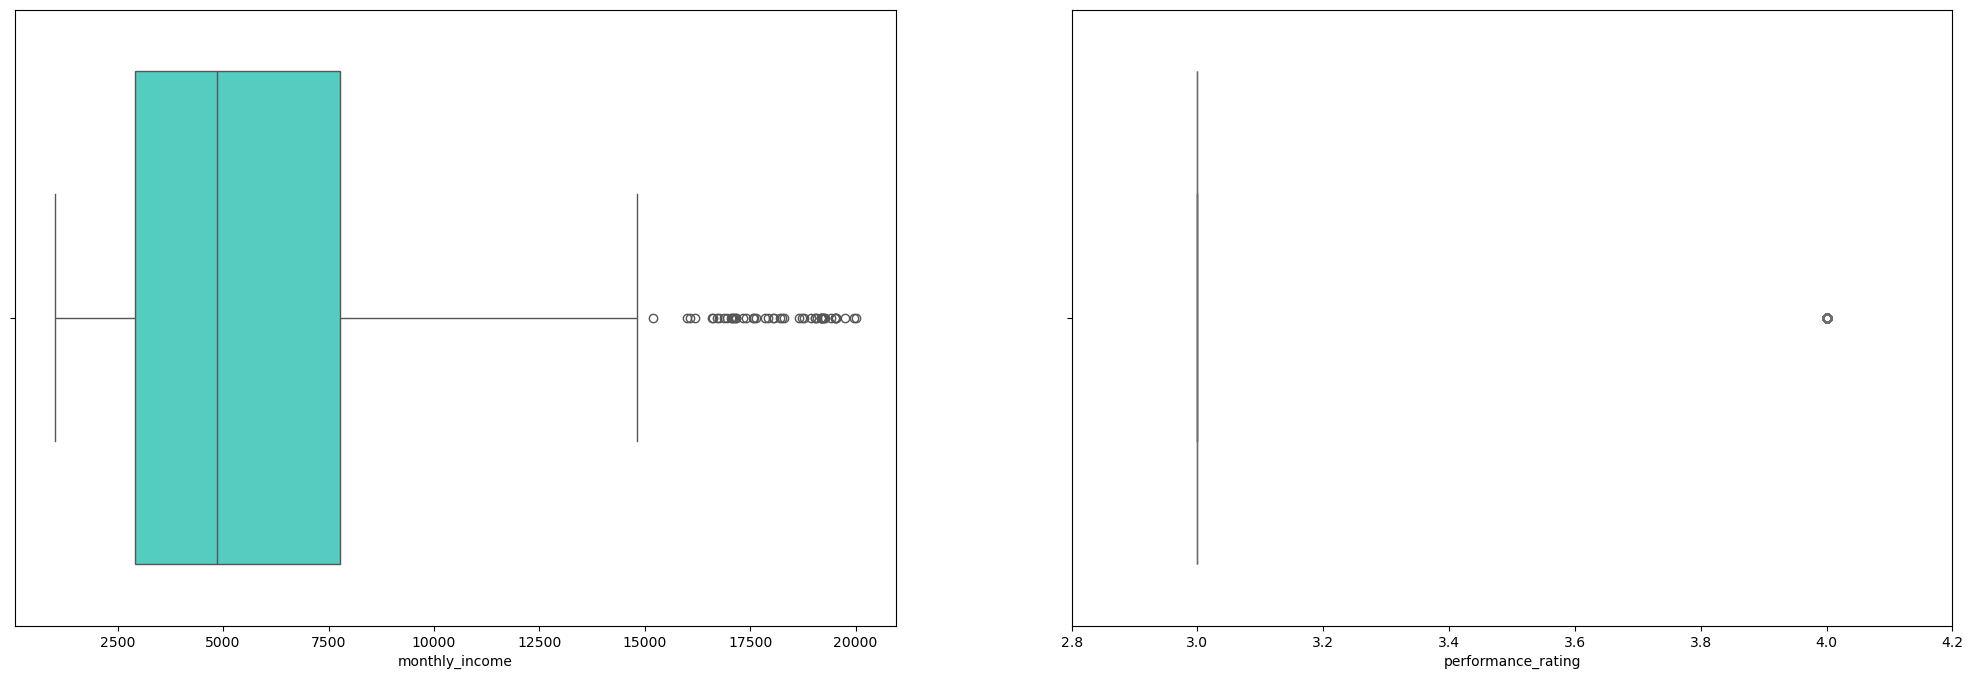

In [63]:
# Crear el subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(25, 8))  # Aumenta el tamaño de la figura

# Primer boxplot
sns.boxplot(x="monthly_income",
            data=df_prueba,
            width=0.8,
            color="turquoise",
            ax=axes[0])

# Segundo boxplot
sns.boxplot(x="performance_rating",
            data=df_prueba,
            width=0.8,
            color="violet",
            ax=axes[1])

# Ajustar límites de los ejes para ver los cuartiles mejor
axes[1].set_xlim(2.8, 4.2)

- monthly_income --> 51 % valores nulos y muchos outliers --> IterativeImputer = porcentaje alto de valores nulos y muchos outliers.

- performance_rating --> 12 % valores nulos y pocos otliers --> SimpleImputer (Mediana) = porcentaje bajo de valores nulos y pocos outliers.

In [80]:
df_prueba1 = df_prueba.copy()

- **monthly_income**

In [81]:
len(df_prueba[["monthly_income"]])

1080

In [82]:
outliers= (df_prueba[["monthly_income"]]>15000).sum()/len(df_prueba[["monthly_income"]])
outliers

monthly_income    0.047222
dtype: float64

In [83]:
df_prueba1[["monthly_income"]].describe()

,monthly_income
count,520.000000
mean,6463.923077
std,4796.634177
min,1009.000000
25%,2907.750000
50%,4862.000000
75%,7782.250000
max,19999.000000


In [84]:
salario_rol=pd.DataFrame(df_prueba1.groupby("job_role")["monthly_income"].mean().round(2))
salario_rol

,monthly_income
job_role,
Healthcare Representative,7802.60
Human Resources,4378.44
Laboratory Technician,3347.51
Manager,17530.00
Manufacturing Director,7205.33
Research Director,16784.28
Research Scientist,3345.25
Sales Executive,6807.38
Sales Representative,2611.36


In [85]:
for rol in df_prueba1["job_role"]:
    if rol in salario_rol.index:
          df_prueba1.loc[(df_prueba1["job_role"] == rol) & df_prueba1["monthly_income"].isnull(), "monthly_income"] = salario_rol.loc[rol, "monthly_income"]
df_prueba1.head(10)


,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,0,51,3,5,Research Director,3,Unknown,19537.00,6462.0,7,Yes,No,13,3.0,3,NaN,0,NaN,5,3.0,20,15,15,1972,1.000000e+09,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,0,65,2,5,Manager,3,Unknown,19999.00,5678.0,0,Yes,No,14,3.0,1,NaN,1,34.0,5,3.0,33,11,9,1971,1.000000e+09,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,0,58,3,5,Manager,4,Married,19232.00,4933.0,1,Yes,No,11,3.0,4,NaN,0,22.0,3,NaN,22,11,15,1981,1.000000e+09,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,NaN,1,1,82,3,4,Research Director,3,Married,17169.00,26703.0,3,Yes,No,19,3.0,2,NaN,2,NaN,2,NaN,20,5,6,1976,1.000000e+09,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,1,58,3,4,Manager,4,Unknown,17174.00,2437.0,3,Yes,No,11,3.0,2,NaN,1,NaN,3,3.0,22,4,7,1975,1.000000e+09,Yes
5,59,No,Unknown,1435.0,Sales,25,3,Life Sciences,1,81.0,1,1,99,3,3,Sales Executive,1,Unknown,6807.38,2354.0,7,Yes,No,11,3.0,4,NaN,0,28.0,3,2.0,21,7,9,1964,1.000000e+09,Yes
6,42,No,travel rarely,635.0,Sales,1,1,Other,1,387.0,2,0,99,3,2,Sales Executive,3,Married,6807.38,24532.0,1,Yes,No,25,4.0,3,NaN,0,20.0,3,3.0,20,11,6,1981,1.000000e+09,No
7,41,No,travel frequently,840.0,Research & Development,9,3,Other,1,999.0,1,0,64,3,5,Research Director,3,Unknown,16784.28,3735.0,2,Yes,No,17,3.0,2,NaN,1,21.0,2,4.0,18,0,11,1982,1.000000e+09,No
8,41,No,non travel,247.0,Research & Development,7,1,Other,1,1035.0,2,1,55,1,5,Research Director,3,Unknown,19973.00,20284.0,1,Yes,No,22,4.0,2,NaN,2,NaN,3,3.0,21,5,10,1982,1.000000e+09,No
9,41,Yes,travel rarely,1360.0,Research & Development,12,3,Other,1,58.0,2,1,49,3,5,Research Director,3,Married,19545.00,16280.0,1,Yes,No,12,3.0,4,NaN,0,NaN,0,3.0,22,15,8,1982,1.000000e+09,No


In [88]:
# Comprobar los nulos
print(f"Después del 'Media por rol' tenemos: \n{df_prueba1[['monthly_income']].isnull().sum()} nulos")

Después del 'Media por rol' tenemos: 
monthly_income    0
dtype: int64 nulos


- **performance_rating**

In [89]:
# Instanciar la clase de SimpleImputer
imputar_performance_rating = SimpleImputer(strategy = "median")

# Ajustar y transformamos los datos.
performance_rating_limpio = imputar_performance_rating.fit_transform(df_prueba1[["performance_rating"]])
 
performance_rating_limpio

array([[3.],
       [3.],
       [3.],
       ...,
       [3.],
       [3.],
       [3.]])

In [90]:
# Introducir el array en el DataFrame
df_prueba1["performance_rating"] = performance_rating_limpio

# Comprobar los nulos. 
print(f"Después del 'SimpleImputer' tenemos {df_prueba1['performance_rating'].isnull().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


**3. Cambio de TIPO DE DATO** (de float a int). 

In [91]:
df_prueba1["monthly_rate"] = df_prueba1["monthly_rate"].astype(int)
df_prueba1["monthly_rate"].dtypes

dtype('int64')

In [92]:
df_prueba1["performance_rating"] = df_prueba1["performance_rating"].astype(int)
df_prueba1["performance_rating"].dtypes

dtype('int64')

In [93]:
df_prueba1.sample(10)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
88,52,No,travel rarely,956.0,Research & Development,6,2,Other,1,630.0,4,0,78,3,2,Research Scientist,1,Divorced,5577.00,22087,3,Yes,Yes,12,3,2,NaN,2,18.0,3,3.0,10,6,9,1971,1.000000e+09,Yes
562,41,No,Unknown,548.0,Research & Development,9,4,Life Sciences,1,1772.0,3,0,94,3,1,Laboratory Technician,1,Divorced,3347.51,20520,1,Yes,No,20,4,2,80.0,2,5.0,2,3.0,5,0,4,1982,1.000000e+09,Yes
328,35,No,Unknown,1370.0,Research & Development,27,4,Life Sciences,1,1728.0,4,0,49,3,2,Manufacturing Director,3,Married,7205.33,5151,2,Yes,No,16,3,2,80.0,1,17.0,3,3.0,7,0,7,1988,1.000000e+09,Yes
224,31,No,travel rarely,691.0,Sales,13,3,Marketing,1,438.0,4,0,73,3,2,Sales Executive,4,Unknown,6807.38,7143,4,Yes,No,12,3,4,NaN,3,13.0,3,3.0,7,1,7,1992,1.000000e+09,Yes
1055,38,No,travel rarely,833.0,Research & Development,18,3,Medical,1,1766.0,2,0,60,1,2,Healthcare Representative,4,Married,7802.60,24539,3,Yes,No,16,3,3,NaN,1,NaN,2,3.0,1,1,0,1985,1.000000e+09,Yes
108,29,No,travel rarely,332.0,Research & Development,17,3,Other,1,1419.0,2,0,51,2,3,Human Resources,1,Single,7988.00,9769,1,Yes,No,13,3,1,NaN,0,NaN,3,2.0,10,0,9,1994,1.000000e+09,No
593,46,No,travel rarely,705.0,Research & Development,2,4,Marketing,1,38.0,2,1,83,3,5,Manager,1,Single,18947.00,22822,3,Yes,No,12,3,4,NaN,0,22.0,2,2.0,2,2,1,1977,1.000000e+09,No
848,23,No,Unknown,571.0,Research & Development,12,2,Other,1,1982.0,4,0,78,3,1,Laboratory Technician,4,Single,3347.51,13672,1,Yes,No,13,3,3,80.0,0,NaN,6,4.0,5,1,4,2000,1.000000e+09,Yes
20,35,No,Unknown,776.0,Sales,1,4,Marketing,1,100.0,3,0,32,2,2,Sales Executive,1,Single,6807.38,23016,0,Yes,No,14,3,2,80.0,0,16.0,2,3.0,15,2,8,1988,1.000000e+09,No
168,53,No,Unknown,447.0,Research & Development,2,3,Medical,1,1472.0,4,0,39,4,4,Research Director,2,Single,16598.00,19764,4,Yes,No,12,3,2,NaN,0,35.0,2,2.0,9,8,8,1970,1.000000e+09,Yes


Columna Employee number

In [94]:
import random

# Paso 1: Identificar valores únicos existentes. 
# Creamos un set con todos los valores unicos de employee_numbers que existen e 
# ignoramos los nulos.
numeros_actuales = set(df_prueba1['employee_number'].dropna().unique())

# Paso 2: Definir la cantidad de valores nulos (tenemos 534 nulos)
num_nulos = df_prueba1['employee_number'].isnull().sum()

# Paso 3: Creamos un bucle while que se repetirá hasta que el conjunto 
# numeros_nuevos contenga tantos números únicos como el número de valores 
# nulos 534(almacenado en num_nulos).
# Generar números aleatorios únicos para rellenar los nulos (los 534)
numeros_nuevos = set()
while len(numeros_nuevos) < num_nulos:
    numero_random = random.randint(100, 2000)  # Generar números desde el 100 hasta el 2000
    if numero_random not in numeros_actuales and numero_random not in numeros_nuevos:
        numeros_nuevos.add(numero_random)

# Paso 4: Rellenar los valores nulos Descripción: Este paso asigna los nuevos números generados (numeros_nuevos) a las filas donde hay valores nulos en la columna 'employee_number'.
df_prueba1.loc[df_prueba1['employee_number'].isnull(), 'employee_number'] = list(numeros_nuevos)

# Mostrar el DataFrame resultante
print(df_prueba1['employee_number'])

0        162.0
1        259.0
2        319.0
3       1462.0
4       1900.0
5         81.0
6        387.0
7        999.0
8       1035.0
9         58.0
10       558.0
11       825.0
12      1712.0
13        73.0
14       820.0
15      1294.0
16      1774.0
17      1815.0
18      1993.0
19        32.0
20       100.0
21       244.0
22       327.0
23       373.0
24       729.0
25       830.0
26       981.0
27      1042.0
28      1080.0
29      1995.0
30       145.0
31       158.0
32       391.0
33       436.0
34      1527.0
35      1866.0
36      2026.0
37       107.0
38       170.0
39       215.0
40       304.0
41       529.0
42       691.0
43       692.0
44      1005.0
45      1024.0
46      1039.0
47      1225.0
48      1375.0
49      1661.0
50      1668.0
51      1698.0
52      1937.0
53      2017.0
54       117.0
55       131.0
56       153.0
57       307.0
58       374.0
59       524.0
60       569.0
61       899.0
62      1014.0
63      1117.0
64      1238.0
65      1277.0
66      15

In [95]:
# Revisamos si tenemos duplicados
print('Comprobación duplicados',df_prueba1["employee_number"].duplicated().sum())

# Revisamos si tenemos nulos
print('Comprobación nulos', df_prueba1["employee_number"].isnull().sum())

Comprobación duplicados 0
Comprobación nulos 0


Columna hourly_rate: Pasamos a Float y los "Not Available" los convertimos a nulos y los nulos los gestionamos con el valor medio.

In [96]:
# Lo primero, pasamos a FLOAT y con esta funcion los valores donde aparece not availalble se convertiran a NaN

def pasar_a_float(num):  #  argumento num, será el valor de la celda que queremos convertir a un número de tipo float
    try:
        return float(num.replace(",", "."))
    except (ValueError, AttributeError): #  Si se produce un ValueError (por ejemplo, si la cadena no puede convertirse en número) o un AttributeError (si num no es una cadena y por lo tanto no tiene el método replace()), se maneja el error sin que el programa falle.
        return np.nan     #  Si ocurre algún error en el intento de conversión (como un valor no válido o un dato que no sea una cadena), la función devuelve np.nan (Not a Number), que es un valor especial utilizado para representar datos faltantes en pandas.

df_prueba1["hourly_rate"] = df_prueba1["hourly_rate"].apply(pasar_a_float)


In [97]:
df_prueba1["hourly_rate"].value_counts().reset_index()

,hourly_rate,count
0,92.0,21
1,66.0,21
2,98.0,21
3,43.0,20
4,48.0,20
5,96.0,20
6,32.0,20
7,72.0,20
8,84.0,19
9,87.0,19


In [98]:
# y sus porcentajes para ver si algun valor destaca sobre los demas

df_prueba1["hourly_rate"].value_counts() / df_prueba1.shape[0] * 100


hourly_rate
92.0     1.944444
66.0     1.944444
98.0     1.944444
43.0     1.851852
48.0     1.851852
96.0     1.851852
32.0     1.851852
72.0     1.851852
84.0     1.759259
87.0     1.759259
57.0     1.759259
54.0     1.666667
46.0     1.666667
56.0     1.666667
77.0     1.666667
79.0     1.574074
73.0     1.574074
42.0     1.481481
86.0     1.481481
45.0     1.481481
51.0     1.481481
81.0     1.481481
83.0     1.481481
52.0     1.481481
90.0     1.481481
60.0     1.388889
94.0     1.388889
97.0     1.388889
95.0     1.388889
37.0     1.388889
62.0     1.388889
58.0     1.388889
99.0     1.296296
64.0     1.296296
35.0     1.296296
67.0     1.296296
65.0     1.296296
85.0     1.296296
80.0     1.296296
74.0     1.296296
33.0     1.296296
49.0     1.203704
44.0     1.203704
61.0     1.203704
75.0     1.203704
100.0    1.203704
59.0     1.203704
71.0     1.111111
82.0     1.111111
63.0     1.111111
76.0     1.111111
78.0     1.111111
40.0     1.111111
41.0     1.111111
55.0     1.11111

In [99]:
# Gestionamos los nulos con el promedio(media)
df_prueba1["hourly_rate"].fillna(df_prueba1["hourly_rate"].mean(), inplace=True)

/var/folders/fz/6pfhl_yj00jd3p96rvwr5zjh0000gn/T/ipykernel_5103/1687806704.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prueba1["hourly_rate"].fillna(df_prueba1["hourly_rate"].mean(), inplace=True)


In [100]:
# Comprobamos que ya no hay nulos
df_prueba1["hourly_rate"].isnull().sum()

0

In [101]:
df_prueba1.head(6)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,0,51.0,3,5,Research Director,3,Unknown,19537.00,6462,7,Yes,No,13,3,3,NaN,0,NaN,5,3.0,20,15,15,1972,1.000000e+09,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,0,65.0,2,5,Manager,3,Unknown,19999.00,5678,0,Yes,No,14,3,1,NaN,1,34.0,5,3.0,33,11,9,1971,1.000000e+09,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,0,58.0,3,5,Manager,4,Married,19232.00,4933,1,Yes,No,11,3,4,NaN,0,22.0,3,NaN,22,11,15,1981,1.000000e+09,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,1,82.0,3,4,Research Director,3,Married,17169.00,26703,3,Yes,No,19,3,2,NaN,2,NaN,2,NaN,20,5,6,1976,1.000000e+09,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,1,58.0,3,4,Manager,4,Unknown,17174.00,2437,3,Yes,No,11,3,2,NaN,1,NaN,3,3.0,22,4,7,1975,1.000000e+09,Yes
5,59,No,Unknown,1435.0,Sales,25,3,Life Sciences,1,81.0,1,1,99.0,3,3,Sales Executive,1,Unknown,6807.38,2354,7,Yes,No,11,3,4,NaN,0,28.0,3,2.0,21,7,9,1964,1.000000e+09,Yes


Columna Gender- Cambio datos

In [102]:
df_prueba1["gender"].unique()

array([0, 1])

In [103]:
dicc_gender= {0:'Male',1:'Female'}

df_prueba1["gender"] = df_prueba1["gender"].replace(dicc_gender)

In [104]:
df_prueba1['gender'].isnull().sum()

0

-**Total Working years- Work life balance**

In [105]:
# Instanciar la clase de SimpleImputer
imputar_work_life_balance= SimpleImputer(strategy = "mean")

# Ajustar y transformamos los datos.
performance_work_balance_limpio = imputar_work_life_balance.fit_transform(df_prueba1[["work_life_balance"]])
 
performance_work_balance_limpio

array([[3.        ],
       [3.        ],
       [2.76656775],
       ...,
       [2.        ],
       [2.76656775],
       [2.76656775]])

In [106]:
# Introducir el array en el DataFrame
df_prueba1["work_life_balance"] = performance_work_balance_limpio

# Comprobar los nulos. 
print(f"Después del 'SimpleImputer' tenemos {df_prueba1["work_life_balance"].isnull().sum()} nulos")

Después del 'SimpleImputer' tenemos 0 nulos


- **Total_working_years**

In [60]:
df_copia= df_prueba.copy()

In [107]:
# Instanciar la clase de InterativeImputer
imputar_total_working_years = IterativeImputer(max_iter = 20, random_state = 42)

# Ajustar y tranformar los datos
total_working_years_limpio = imputar_total_working_years.fit_transform(df_prueba1[["total_working_years"]])
total_working_years_limpio

array([[11.25],
       [34.  ],
       [22.  ],
       ...,
       [ 8.  ],
       [11.25],
       [11.25]])

In [108]:
df_prueba1["total_working_years_interative"] = total_working_years_limpio

In [109]:
# instanciamos la clase del KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)

# ajustamos y transformamos los datos, asegurándonos de que sea un DataFrame
imputer_knn_imputado = imputer_knn.fit_transform(df_prueba1[["total_working_years"]])

# comprobamos el resultado
imputer_knn_imputado


array([[11.25],
       [34.  ],
       [22.  ],
       ...,
       [ 8.  ],
       [11.25],
       [11.25]])

In [110]:
# por último nos queda añadir ese array al DataFrame como hemos hecho hasta ahora
df_prueba1["total_working_years_knn"] = imputer_knn_imputado


In [111]:
df_prueba1.describe()[["total_working_years","total_working_years_knn", "total_working_years_interative"]]

,total_working_years,total_working_years_knn,total_working_years_interative
count,720.000000,1080.000000,1080.000000
mean,11.250000,11.250000,11.250000
std,7.567499,6.177405,6.177405
min,0.000000,0.000000,0.000000
25%,6.000000,8.000000,8.000000
50%,10.000000,11.250000,11.250000
75%,15.000000,11.250000,11.250000
max,40.000000,40.000000,40.000000


In [112]:
df_prueba1["total_working_years"]= imputer_knn_imputado

In [113]:
df_prueba1.head(2)

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work,total_working_years_interative,total_working_years_knn
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,Yes,No,13,3,3,NaN,0,11.25,5,3.0,20,15,15,1972,1.000000e+09,Yes,11.25,11.25
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Yes,No,14,3,1,NaN,1,34.00,5,3.0,33,11,9,1971,1.000000e+09,Yes,34.00,34.00


**Standard hours** 

In [114]:
df_prueba1["standard_hours"].dtype

dtype('float64')

In [115]:
df_prueba1["standard_hours"]= 40

In [116]:
df_prueba1["standard_hours"].isnull().sum()

0

In [117]:
df_prueba1["standard_hours"]= 40

**Round float** 

In [76]:
df_prueba.columns

Index(['age', 'attrition', 'business_travel', 'daily_rate', 'department',
       'distance_from_home', 'education', 'education_field', 'employee_count',
       'employee_number', 'environment_satisfaction', 'gender', 'hourly_rate',
       'job_involvement', 'job_level', 'job_role', 'job_satisfaction',
       'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over18', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'standard_hours',
       'stock_option_level', 'total_working_years', 'training_times_last_year',
       'work_life_balance', 'years_at_company', 'years_since_last_promotion',
       'years_with_curr_manager', 'year_birth', 'salary', 'remote_work'],
      dtype='object')

In [118]:
lista_float=["work_life_balance","daily_rate","hourly_rate","monthly_income"]

# Aplicar el redondeo a las columnas especificadas
df_prueba1[lista_float] = df_prueba1[lista_float].round(2)

In [119]:
df_prueba1.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work,total_working_years_interative,total_working_years_knn
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,19537.0,6462,7,Yes,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,1.000000e+09,Yes,11.25,11.25
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,19999.0,5678,0,Yes,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,1.000000e+09,Yes,34.00,34.00
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,19232.0,4933,1,Yes,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,1.000000e+09,Yes,22.00,22.00
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,17169.0,26703,3,Yes,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,1.000000e+09,No,11.25,11.25
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,17174.0,2437,3,Yes,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,1.000000e+09,Yes,11.25,11.25


**Salary** 

In [120]:
df_prueba2= df_prueba1.copy()

In [126]:
# Calculo salario anual 
df_prueba1["salary"]= df_prueba1["monthly_income"]

df_prueba1[["salary","monthly_income"]].head()

,salary,monthly_income
0,19537.0,19537.0
1,19999.0,19999.0
2,19232.0,19232.0
3,17169.0,17169.0
4,17174.0,17174.0


In [129]:
# Calculo salario mensual

df_prueba1["monthly_income"]= (df_prueba1["salary"]/12).round(2)

df_prueba1.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over18,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work,total_working_years_interative,total_working_years_knn
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,Yes,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes,11.25,11.25
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,Yes,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes,34.00,34.00
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,Yes,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes,22.00,22.00
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,Yes,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No,11.25,11.25
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,Yes,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes,11.25,11.25


**Eliminación over18**

In [137]:
df_prueba1= df_prueba1.drop(["total_working_years_interative","total_working_years_knn"], axis=1)

In [138]:
df_prueba1.head()

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.0,Research & Development,6,3,Other,1,162.0,1,Male,51.0,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.0,Yes
1,52,No,Unknown,699.0,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.0,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.0,Yes
2,42,No,travel rarely,532.0,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.0,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.0,Yes
3,47,No,travel rarely,359.0,Research & Development,2,4,Medical,1,1462.0,1,Female,82.0,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.0,No
4,48,No,Unknown,117.0,Research & Development,22,3,Medical,1,1900.0,4,Female,58.0,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.0,Yes


In [132]:
df_prueba1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             1080 non-null   int64  
 1   attrition                       1080 non-null   object 
 2   business_travel                 1080 non-null   object 
 3   daily_rate                      1080 non-null   float64
 4   department                      1080 non-null   object 
 5   distance_from_home              1080 non-null   int64  
 6   education                       1080 non-null   int64  
 7   education_field                 1080 non-null   object 
 8   employee_count                  1080 non-null   int64  
 9   employee_number                 1080 non-null   float64
 10  environment_satisfaction        1080 non-null   int64  
 11  gender                          1080 non-null   object 
 12  hourly_rate                     10

In [139]:
df_prueba1.to_csv("Dataset_HR_final.csv", index= False)

In [141]:
df_prueba1

,age,attrition,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_since_last_promotion,years_with_curr_manager,year_birth,salary,remote_work
0,51,No,Unknown,684.00,Research & Development,6,3,Other,1,162.0,1,Male,51.00,3,5,Research Director,3,Unknown,1628.08,6462,7,No,13,3,3,40,0,11.25,5,3.00,20,15,15,1972,19537.00,Yes
1,52,No,Unknown,699.00,Research & Development,1,4,Life Sciences,1,259.0,3,Male,65.00,2,5,Manager,3,Unknown,1666.58,5678,0,No,14,3,1,40,1,34.00,5,3.00,33,11,9,1971,19999.00,Yes
2,42,No,travel rarely,532.00,Research & Development,4,2,Technical Degree,1,319.0,3,Male,58.00,3,5,Manager,4,Married,1602.67,4933,1,No,11,3,4,40,0,22.00,3,2.77,22,11,15,1981,19232.00,Yes
3,47,No,travel rarely,359.00,Research & Development,2,4,Medical,1,1462.0,1,Female,82.00,3,4,Research Director,3,Married,1430.75,26703,3,No,19,3,2,40,2,11.25,2,2.77,20,5,6,1976,17169.00,No
4,48,No,Unknown,117.00,Research & Development,22,3,Medical,1,1900.0,4,Female,58.00,3,4,Manager,4,Unknown,1431.17,2437,3,No,11,3,2,40,1,11.25,3,3.00,22,4,7,1975,17174.00,Yes
5,59,No,Unknown,1435.00,Sales,25,3,Life Sciences,1,81.0,1,Female,99.00,3,3,Sales Executive,1,Unknown,567.28,2354,7,No,11,3,4,40,0,28.00,3,2.00,21,7,9,1964,6807.38,Yes
6,42,No,travel rarely,635.00,Sales,1,1,Other,1,387.0,2,Male,99.00,3,2,Sales Executive,3,Married,567.28,24532,1,No,25,4,3,40,0,20.00,3,3.00,20,11,6,1981,6807.38,No
7,41,No,travel frequently,840.00,Research & Development,9,3,Other,1,999.0,1,Male,64.00,3,5,Research Director,3,Unknown,1398.69,3735,2,No,17,3,2,40,1,21.00,2,4.00,18,0,11,1982,16784.28,No
8,41,No,non travel,247.00,Research & Development,7,1,Other,1,1035.0,2,Female,55.00,1,5,Research Director,3,Unknown,1664.42,20284,1,No,22,4,2,40,2,11.25,3,3.00,21,5,10,1982,19973.00,No
9,41,Yes,travel rarely,1360.00,Research & Development,12,3,Other,1,58.0,2,Female,49.00,3,5,Research Director,3,Married,1628.75,16280,1,No,12,3,4,40,0,11.25,0,3.00,22,15,8,1982,19545.00,No
